<a href="https://colab.research.google.com/github/danrdoran/Data-science-projects/blob/main/Deep_Learning_Project_Food_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Food Image Classification

----------------------------------------------------------------------
## **Context** 
-------------------------------------------------------------------------------
Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The Convolution neural network is the most popular and extensively used image classification technique in the latest day.

Clicks is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

--------------------------------------------------------------------------------
## **Objective**
--------------------------------------------------------------------------------
Clicks have decided to use only three categories of food (**Bread**, **Soup**, and  **Vegetables-Fruits**) for now, and you as a data scientist at Clicks, need to build a classification model using a dataset consisting of images that would help to label the images into different categories. 

-----------------------------------------------------------------------------
## **Dataset**
----------------------------------------------------------------------------
The dataset folder contains different food images. The images are already split into Training and Testing folders.
Each folder has  four subfolders named **`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**. These folders have images of the respective classes.

## **Mount the Drive**

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2 
import seaborn as sns 

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

## **Importing the Dataset**

I will import the dataset from my Google Drive:



In [53]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/ADSP/Food_Data.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Preparing the Data**

The dataset has two folders, i.e., 'Training' and 'Testing'. Each of these folders has three sub-folders, namely 'Bread', 'Soup', and 'Vegetable-Fruit'. We will have the Training and Testing path stored in a variable named 'DATADIR'. The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'. 

### **Training Data**

We will convert each image into arrays and store them in an array called 'training_data' along with their class index. So this is how our training data looks like.

In [54]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "/content/Food_Data/Training"                                        # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150    

In [55]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []  

# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR, category)                                 # Joining images with labels
        class_num = category                                                   
        
        for img in os.listdir(path):                                           
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
          
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images 
          
            training_data.append([new_array, class_num])                       # Appending both the images and labels

create_training_data()

### **Testing Data**

We will do the same operation with our Testing data. We will convert each images into arrays and then append them to our array named 'testing_data' along with their class indexes.

In [56]:
DATADIR2 = "/content/Food_Data/Testing"                                        # Path of training data after unzipping
CATEGORIES2 = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE2 = 150                                                                 # Defining the size of the image to 150    

In [57]:
testing_data = []  

# Storing all the testing images
def create_testing_data():
    for category2 in CATEGORIES2:                                                # Looping over each category from the CATEGORIES list
        path2 = os.path.join(DATADIR2, category2)                                 # Joining images with labels
        class_num2 = category2                                                   
        
        for img2 in os.listdir(path2):                                           
            img_array2 = cv2.imread(os.path.join(path2, img2))                    # Reading the data
          
            new_array2 = cv2.resize(img_array2, (IMG_SIZE2, IMG_SIZE2))            # Resizing the images 
          
            testing_data.append([new_array2, class_num2])                       # Appending both the images and labels

create_testing_data()

## **Visualizing images randomly from each class**

-----------------------------------------------------------------------------------------
### **Bread**
------------------------------------------------------------------------------------

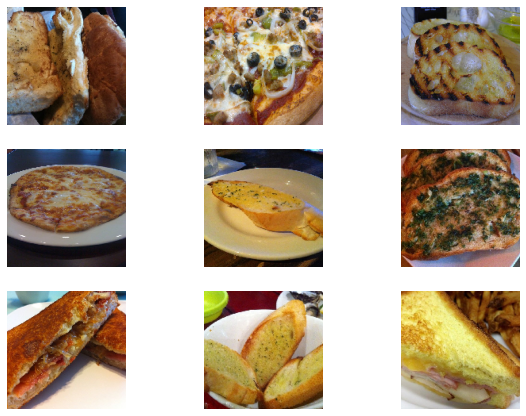

In [58]:
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
select_bread = np.random.choice(bread_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations:**
- We can observe that all images are very diverse in nature, but they all contain bread in some form.

------------------------------------------------------------------------------------------------
### **Soup**
-------------------------------------------------------------------------------------

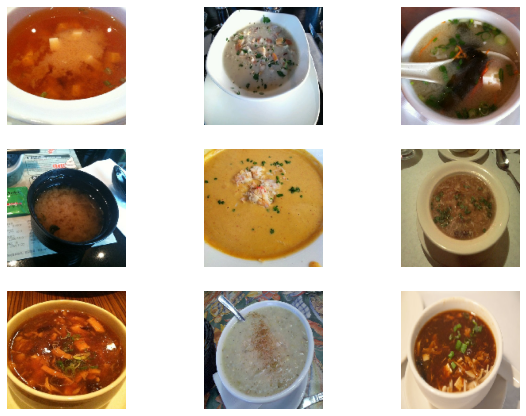

In [59]:
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
select_soup = np.random.choice(soup_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations:**
- Likewise we have a nice variety of images in the soup category, but all clearly correspond to soup.

-------------------------------------------------------------------------------------------------------
### **Vegetable-Fruit**
--------------------------------------------------------------------------------------

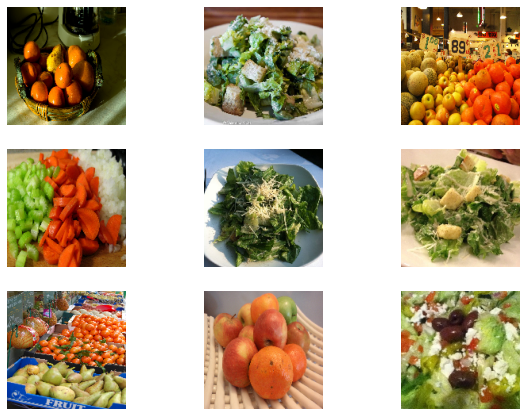

In [60]:
vegetable_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
select_vegetable_fruit = np.random.choice(vegetable_fruit_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_vegetable_fruit[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations:**
- We can see that all images correspond to fruits and vegetables.

### **Data Preprocessing** 

The arrays training_data and testing_data had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our training_data and testing_data were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our training_data and testing_data, and store the images in X_train, and X_test, and the labels in y_train, and y_test respectively.

In [61]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [62]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

In [63]:
# Converting the pixel values into Numpy array
X_train = np.array(X_train) 
X_test = np.array(X_test) 
X_train.shape

(3203, 150, 150, 3)

**Note:** Images are digitally represented in the form of NumPy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using NumPy arrays directly. So, even if the data is provided in the form of NumPy arrays rather than images, we can use this to work on our model. 

In [64]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object) 
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

Since the given data is stored in variables X_train, X_test, y_train, and y_test, there is no need to split the data further. 

## **Checking Distribution of Classes**

In [65]:
# Print the value counts of target variable y_train
print(y_train.value_counts())
print("----------")
print(y_test.value_counts())

Label          
Soup               1500
Bread               994
Vegetable-Fruit     709
dtype: int64
----------
Label          
Soup               500
Bread              362
Vegetable-Fruit    232
dtype: int64


## **Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training the model of a neural network: 

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [66]:
X_train = X_train/255

In [67]:
X_test = X_test/255

## **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels.

In this case, we have 3 classes "Bread", "Soup", and "Vegetable-Fruit". We want the corresponding labels to look like:
* [1, 0, 0] --------- Bread
* [0, 1, 0] --------- Soup
* [0, 0, 1] --------- Vegetable-Fruit


Each class will be represented in the form of an array.

In [68]:
y_train_encoded = [ ]

for label_name in y_train["Label"]:
    if(label_name == 'Bread'):
        y_train_encoded.append(0)

    if(label_name == 'Soup'):
        y_train_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_train_encoded.append(2)

y_train_encoded = to_categorical(y_train_encoded, 3)
y_train_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [69]:
y_test_encoded = [ ]

for label_name in y_test["Label"]:
    if(label_name == 'Bread'):
        y_test_encoded.append(0)

    if(label_name == 'Soup'):
        y_test_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_test_encoded.append(2)

y_test_encoded = to_categorical(y_test_encoded, 3)
y_test_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## **Model Building** 

Now that we have done data preprocessing, let's build the first Convolutional Neural Network (CNN) model.

### **Model 1 Architecture:**

* The first CNN Model will have three convolutional blocks.
* Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
* Add first Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and use **padding = 'same'**.
* Add a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Use the **'same' padding** and **'relu activation**.
* Follow it up with another MaxPooling2D layer **kernel size 2x2** and use **padding = 'same'**.
* Add a third Conv2D layer with **32 filters and the kernel size of 3x3**. Use the **'same' padding** and **'relu activation**. Once again, follow it up with another Maxpooling2D layer with **kernel size 2x2** and **padding = 'same'**.
* Once the convolutional blocks are added, add the Flatten layer.
* Finally, add dense layers. 
* Add first Dense layer with **100 neurons** and **'relu' activation**
* The last dense layer must have as many neurons as the number of classes, which in this case is 3 and use **'softmax' activation**.
* Initialize SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**
* Compile your model using the optimizer you initialized and use **categorical_crossentropy** as the loss function and 'accuracy' as the metric
* Print the model summary and write down your observations/insights about the model.

### **Model 1:**



**Note:** We need to clear the previous model's history from the Keras backend. Also, we must fix the seed for random number generators after clearing the backend to make sure we receive the same output every time we run the code.

In [70]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [71]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# Compiling the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

**Observations:**
- Our model had 1,185,107 trainable parameters.


### **Training the Model**

Let's now train the model using the training data.

In [72]:
# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 60 epochs and validation_split as 10%
history = model.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size= 32, validation_split = 0.10, callbacks = [es, mc])  

Epoch 1/60
89/91 [============================>.] - ETA: 0s - loss: 1.0514 - accuracy: 0.4554
Epoch 1: val_accuracy improved from -inf to 0.51090, saving model to best_model.h5
91/91 [==============================] - 4s 37ms/step - loss: 1.0511 - accuracy: 0.4549 - val_loss: 0.9682 - val_accuracy: 0.5109
Epoch 2/60
89/91 [============================>.] - ETA: 0s - loss: 0.8962 - accuracy: 0.5453
Epoch 2: val_accuracy improved from 0.51090 to 0.55763, saving model to best_model.h5
91/91 [==============================] - 3s 33ms/step - loss: 0.8937 - accuracy: 0.5468 - val_loss: 0.8876 - val_accuracy: 0.5576
Epoch 3/60
89/91 [============================>.] - ETA: 0s - loss: 0.7730 - accuracy: 0.6064
Epoch 3: val_accuracy did not improve from 0.55763
91/91 [==============================] - 3s 32ms/step - loss: 0.7714 - accuracy: 0.6083 - val_loss: 1.0272 - val_accuracy: 0.4891
Epoch 4/60
89/91 [============================>.] - ETA: 0s - loss: 0.7256 - accuracy: 0.6520
Epoch 4: val_a

### **Plotting the Training and Validation Accuracies**

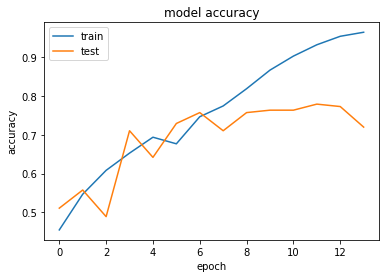

In [73]:
# Plotting the training and validation accuracies for each epoch 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Checking Test Accuracy**

In [74]:
model.evaluate(X_test, (y_test_encoded))

35/35 [==============================] - 1s 15ms/step - loss: 1.1937 - accuracy: 0.7450


[1.1936898231506348, 0.7449725866317749]

**Observations:**
- After running 13 epochs, we were able to achieve a training accuracy of ~98% and a testing accuracy of ~77%.
- The model seems to have overfit on the training dataset and is performing somewhat poorly.

### **Plotting Confusion matrix**

35/35 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       362
           1       0.79      0.82      0.81       500
           2       0.93      0.59      0.72       232

    accuracy                           0.74      1094
   macro avg       0.78      0.72      0.73      1094
weighted avg       0.76      0.74      0.75      1094



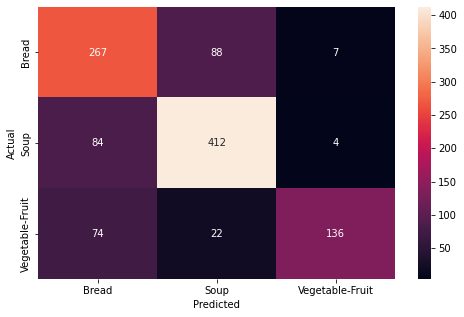

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Let's try to build another model with a different architecture and see if we can improve the model performance. Since the first model was overfitting, we will add Dropout layers at the end of each convolutional block.

### **Model 2 Architecture:**

* We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
* Add first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and **stride size 2x2**.
* Add a Dropout layer with a dropout ratio of **0.25**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Use the **'same' padding** and **'relu' activation**.
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.25 dropout ratio.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Add a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Once the convolutional blocks are added, add the Flatten layer.
* Add first fully connected dense layer with 64 neurons and use **'relu' activation**.
* Add a second fully connected dense layer with 32 neurons and use **'relu' activation**.
* Add your final dense layer with 3 neurons and use **'softmax' activation function**.
* Initialize an **Adam optimizer** with a learning rate of 0.001.
* Compile your model with the optimizer you initialized and use **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
* Print your model summary and write down your observations.

In [76]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [77]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 256 filters and kernel size 5x5, with ReLU activation and padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_2.add(Conv2D(256, (5, 5), activation = 'relu', padding = "same", input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding second conv layer with 128 filters and with kernel size 5x5 and ReLu activation function
model_2.add(Conv2D(128, (5, 5), activation = 'relu', padding = "same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding third conv layer with 64 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding fourth conv layer with 32 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding first fully connected dense layer with 64 neurons 
model_2.add(Dense(64, activation = 'relu'))

# Adding second fully connected dense layer with 32 neurons 
model_2.add(Dense(32, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(3, activation = 'softmax'))

# Using Adam Optimizer
optimizer = Adam(lr = 0.001)

# Compile the model
model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [78]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

**Observations:**
- Our second model also has 1,185,107 trainable parameters.


### **Training the Model**

Let's now train the model using the training data.

In [79]:
es_2 = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc_2 = ModelCheckpoint('best_model.h6', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Train the model here

# Fitting the model with 60 epochs and validation_split as 10%
history_2 = model_2.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size= 32, validation_split = 0.10, callbacks = [es_2, mc_2])  

Epoch 1/60
90/91 [============================>.] - ETA: 0s - loss: 1.0644 - accuracy: 0.4580
Epoch 1: val_accuracy improved from -inf to 0.51090, saving model to best_model.h6


91/91 [==============================] - 16s 167ms/step - loss: 1.0643 - accuracy: 0.4584 - val_loss: 1.0414 - val_accuracy: 0.5109
Epoch 2/60
90/91 [============================>.] - ETA: 0s - loss: 1.0557 - accuracy: 0.4639
Epoch 2: val_accuracy did not improve from 0.51090
91/91 [==============================] - 13s 147ms/step - loss: 1.0559 - accuracy: 0.4636 - val_loss: 1.0265 - val_accuracy: 0.5109
Epoch 3/60
90/91 [============================>.] - ETA: 0s - loss: 1.0520 - accuracy: 0.4639
Epoch 3: val_accuracy did not improve from 0.51090
91/91 [==============================] - 13s 147ms/step - loss: 1.0523 - accuracy: 0.4636 - val_loss: 1.0187 - val_accuracy: 0.5109
Epoch 4/60
90/91 [============================>.] - ETA: 0s - loss: 1.0478 - accuracy: 0.4635
Epoch 4: val_accuracy did not improve from 0.51090
91/91 [==============================] - 13s 147ms/step - loss: 1.0479 - accuracy: 0.4636 - val_loss: 1.0143 - val_accuracy: 0.5109
Epoch 5/60
90/91 [===================

91/91 [==============================] - 15s 162ms/step - loss: 0.9779 - accuracy: 0.5115 - val_loss: 0.8321 - val_accuracy: 0.6199
Epoch 9/60
90/91 [============================>.] - ETA: 0s - loss: 0.8666 - accuracy: 0.5708
Epoch 9: val_accuracy did not improve from 0.61994
91/91 [==============================] - 13s 147ms/step - loss: 0.8665 - accuracy: 0.5711 - val_loss: 0.8161 - val_accuracy: 0.5981
Epoch 10/60
90/91 [============================>.] - ETA: 0s - loss: 0.8461 - accuracy: 0.5844
Epoch 10: val_accuracy did not improve from 0.61994
91/91 [==============================] - 13s 147ms/step - loss: 0.8459 - accuracy: 0.5847 - val_loss: 1.2245 - val_accuracy: 0.4704
Epoch 11/60
90/91 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.4812
Epoch 11: val_accuracy did not improve from 0.61994
91/91 [==============================] - 13s 147ms/step - loss: 1.0301 - accuracy: 0.4813 - val_loss: 0.9790 - val_accuracy: 0.5109
Epoch 12/60
90/91 [==============

91/91 [==============================] - 15s 161ms/step - loss: 0.9187 - accuracy: 0.5632 - val_loss: 0.7539 - val_accuracy: 0.6480
Epoch 15/60
90/91 [============================>.] - ETA: 0s - loss: 0.8089 - accuracy: 0.6229
Epoch 15: val_accuracy improved from 0.64798 to 0.67601, saving model to best_model.h6


91/91 [==============================] - 15s 164ms/step - loss: 0.8086 - accuracy: 0.6232 - val_loss: 0.6989 - val_accuracy: 0.6760
Epoch 16/60
90/91 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.6715
Epoch 16: val_accuracy improved from 0.67601 to 0.76324, saving model to best_model.h6


91/91 [==============================] - 15s 162ms/step - loss: 0.7035 - accuracy: 0.6714 - val_loss: 0.6213 - val_accuracy: 0.7632
Epoch 17/60
90/91 [============================>.] - ETA: 0s - loss: 0.6373 - accuracy: 0.7181
Epoch 17: val_accuracy did not improve from 0.76324
91/91 [==============================] - 13s 147ms/step - loss: 0.6369 - accuracy: 0.7183 - val_loss: 0.6176 - val_accuracy: 0.7414
Epoch 18/60
90/91 [============================>.] - ETA: 0s - loss: 0.5993 - accuracy: 0.7333
Epoch 18: val_accuracy did not improve from 0.76324
91/91 [==============================] - 13s 147ms/step - loss: 0.5998 - accuracy: 0.7332 - val_loss: 0.5492 - val_accuracy: 0.7570
Epoch 19/60
90/91 [============================>.] - ETA: 0s - loss: 0.6054 - accuracy: 0.7483
Epoch 19: val_accuracy did not improve from 0.76324
91/91 [==============================] - 13s 147ms/step - loss: 0.6050 - accuracy: 0.7484 - val_loss: 0.5561 - val_accuracy: 0.7570
Epoch 20/60
90/91 [============

91/91 [==============================] - 15s 162ms/step - loss: 0.5534 - accuracy: 0.7588 - val_loss: 0.5041 - val_accuracy: 0.7944
Epoch 21/60
90/91 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7642
Epoch 21: val_accuracy did not improve from 0.79439
91/91 [==============================] - 13s 147ms/step - loss: 0.5370 - accuracy: 0.7644 - val_loss: 0.5737 - val_accuracy: 0.7695
Epoch 22/60
90/91 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8083
Epoch 22: val_accuracy did not improve from 0.79439
91/91 [==============================] - 13s 147ms/step - loss: 0.4683 - accuracy: 0.8078 - val_loss: 0.5044 - val_accuracy: 0.7757
Epoch 23/60
90/91 [============================>.] - ETA: 0s - loss: 0.5244 - accuracy: 0.7774
Epoch 23: val_accuracy did not improve from 0.79439
91/91 [==============================] - 13s 147ms/step - loss: 0.5256 - accuracy: 0.7769 - val_loss: 0.5839 - val_accuracy: 0.7352
Epoch 24/60
90/91 [============

### **Plotting the Training and Validation Accuracies**

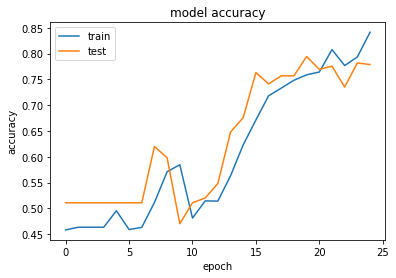

In [80]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Checking Test Accuracy**

In [81]:
model_2.evaluate(X_test, (y_test_encoded))

35/35 [==============================] - 2s 54ms/step - loss: 0.8268 - accuracy: 0.7303


[0.8268106579780579, 0.7303473353385925]

**Observations:**
- After running 25 epochs, we were able to achieve a training accuracy of ~88% and a testing accuracy of ~79%.
Even after using data augmentation and dropout layers, the model has only improved slightly on the testing data.

### **Plotting Confusion matrix**

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred_2 = model_2.predict(X_test)
pred_2 = np.argmax(pred_2, axis = 1) 
y_true_2 = np.argmax(y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true_2, pred_2))

35/35 [==============================] - 2s 51ms/step
              precision    recall  f1-score   support

           0       0.75      0.46      0.57       362
           1       0.67      0.95      0.79       500
           2       0.93      0.69      0.79       232

    accuracy                           0.73      1094
   macro avg       0.79      0.70      0.72      1094
weighted avg       0.76      0.73      0.72      1094



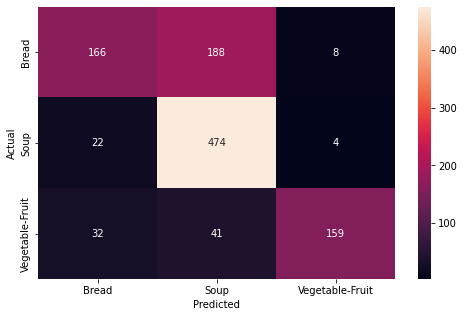

In [83]:
#Plotting the heatmap using confusion matrix
cm_2 = confusion_matrix(y_true_2, pred_2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm_2, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Prediction**

Let us predict using the best model, i.e., model 2, by plotting one random image from X_test data and see if our best model is predicting the image correctly or not.

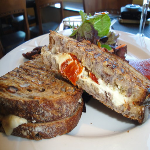

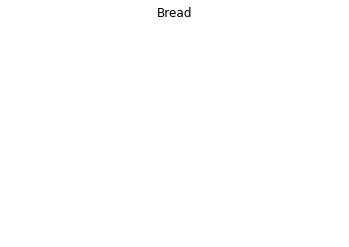

In [91]:
# Plotting the test image 
cv2_imshow(X_test[3]* 255)
i=y_test.Label[3]
i=np.argmax(i)
if(i == 0):
    plt.title("Bread")
if(i==1):
    plt.title("Soup")
if(i==2):
    plt.title("Vegetable-Fruit")

plt.axis('off')
plt.show()

In the blank given below, write the name of the model that had the best results.

In [92]:
# Predicting the test image with the best model and storing the prediction value in res variable
res = model_2.predict(X_test[3].reshape(1, 150, 150, 3))

1/1 [==============================] - 0s 17ms/step


In [93]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

Bread


**Observations:**
- Our second model was able to correctly predict the label of the image.

### **Conclusion:**
- The difference in both models is only slight. Both models have the same number of trainable parameters. 

- Perhaps using transfer learning we could achieve higher accuracies and models which converge after fewer epochs compared with these models that we trained from scratch.

- However, we were still abe to achieve accuracies of 77% and 79% respectively. The model can definitely be further tuned to achieve higher accuracies as desired.